In [44]:
import sys
sys.path.append('../../python_scripts')
from visulize import viewer
from audio import show_audio, IIR, save_audio
import numpy as np
import meshio
import matplotlib.pyplot as plt
import os
# check the mesh and modes

def process_dir(output_dir):
    ret = None
    if os.path.exists(output_dir + 'origin.txt'):
        y = np.loadtxt(output_dir + 'origin.txt')
        sr = y[0]
        y = y[1:]
        y /= abs(y).max()
        save_audio(y, sr, output_dir + 'origin.wav')

    if os.path.exists(output_dir + 'result.txt'):
        y = np.loadtxt(output_dir + 'result.txt')
        sr = y[0]
        y = y[1:]
        y /= abs(y).max()
        save_audio(y, sr, output_dir + 'result.wav')

    if os.path.exists(output_dir + 'modes.txt'):
        mesh = meshio.read(output_dir + 'surface.obj')
        vertices = mesh.points
        vertices -= vertices.mean(axis=0)
        elements = mesh.cells[0].data
        data = np.loadtxt(output_dir + 'modes.txt')
        ret = viewer(vertices, elements, data).show()
    return ret

In [45]:
process_dir('./output/spolling_bowl/ghost/')

In [46]:
process_dir('./output/spolling_bowl/pppm/')

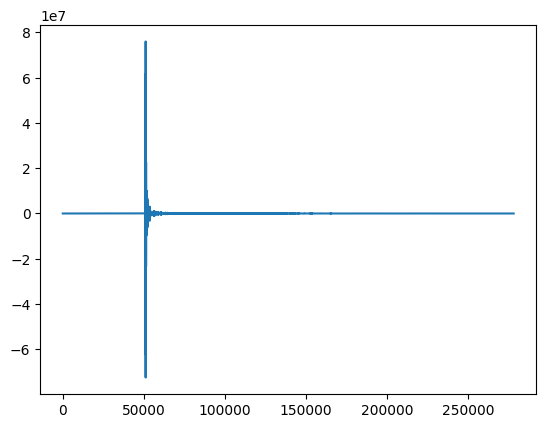

In [48]:
plt.plot(np.loadtxt('./output/spolling_bowl/pppm/result.txt')[1:])